<h1 style="color: #007bff;"><center>Impact of COVID-19 & Overdoses on Pharmaceutical Stocks and ETFs</center></h1>
<ul>
<li>Group Number: 21</li>
<li>Student: Karston Kuciemba</li>
<li>UT EID: ktk654</li>
<li>Student: Ananya Kaalva</li>
<li>UT EID: ak46562</li>
<li>Student: Carolyn Pyun</li>
<li>UT EID: cgp755</li>
<li>Date:  3/16/2024</li>
</ul>

In [2]:
# import needed libraries
import numpy as np
import pandas as pd
import math
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="padding-left: 30px; color: #007bff;">Read in dataframes for visualization</h3>

In [3]:
# covid dfs
tickers = ['LLY', 'JNJ', 'MRK', 'ABBV', 'MRNA', 'PFE', 'AMGN', 'PPH', 'IHE', 'PJP']

covid_dfs= {}

for symbol in tickers:
    # for each symbol, load the pkl file and store it in the dictionary as a df
    covid_dfs[f"{symbol}_df-covid"] = pd.read_csv(f"../pharma-data/merged-dfs/{symbol}_df-covid.csv", parse_dates=True)

# remove last 182 lines bc it is 0 covid deaths (stopped reporting)
for symbol in tickers:
    covid_dfs[f"{symbol}_df-covid"] = covid_dfs[f"{symbol}_df-covid"].iloc[:-182]

for symbol in tickers:
    covid_dfs[f"{symbol}_df-covid"] = covid_dfs[f"{symbol}_df-covid"].rename(columns={"Unnamed: 0": "Date"})

In [4]:
# overdose dfs
tickers = ['LLY', 'JNJ', 'MRK', 'ABBV', 'MRNA', 'PFE', 'AMGN', 'PPH', 'IHE', 'PJP']

overdose_dfs= {}

for symbol in tickers:
    # for each symbol, load the pkl file and store it in the dictionary as a df
    overdose_dfs[f"{symbol}_df-overdose"] = pd.read_csv(f"../pharma-data/merged-dfs/{symbol}_df-overdose.csv", parse_dates=True)

for symbol in tickers:
    overdose_dfs[f"{symbol}_df-overdose"] = overdose_dfs[f"{symbol}_df-overdose"].rename(columns={"Unnamed: 0": "Date"})

# <center style="text-align: center; color: #007bff;">Visualization 1</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
       The purpose of this visualization is to show the variance in pharmaceutical stock prices as it relates to COVID-19. How large were the discrepencies between COVID-19 treatment and/or prevention-related companies vs. non-related ones?
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Altair (Bar Chart & Lines)
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Some companies performed much greater than others. Is this just noise? While the market is unpredictable and no one can know for certain, there is an
        extent of confidence that can be attributed to the idea that any entity with the possibility of treating COVID-19.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        These companies performed "better": LLY (332%), MRNA (702%). This may be expected because, well, they were vaccine providers! This raises the larger question - is decentralizing vaccinations economically efficient? Should it be for-profit, or should there be other ways, such as privatizing retainers for disasters such as COVID-19 or even creating government entities for these events.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        Our analysis found that COVID-19 deaths and the stock prices of vaccine providers were actually positive, albeit very small, compared to non-vaccine providers that were experiencing negative correlations as COVID-19 deaths rose. This discrepancy was found to be statistically significant at the 10% level.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px; padding-bottom: 20px;">
        I'd like to point your attention to the first large spike in COVID-19 deaths - the two largest spikes in stock prices were LLY (63% increase) and MRNA (176% increase), which were both vaccine providers. Now, obviously, they would increase as shown because they're being paid for their services by the United States government. What is fascinating is that AFTER the spike those two continued their positive trend, though their production of vaccines was already public knowledge.
    </li>
    <li style="font-size: 16px; padding-bottom: 20px;">
        This chart combines multiple dataframes into a single graphic. On hover, each stock line will share its ticker, date, closing price, and corresponding COVID-19 related deaths for that day. To allow for specific analysis of each stock, you can scroll, expand, and zoom into the chart. The COVID-19 US deaths are displayed as a background on the chart to allow for ease of understanding when there are spikes, which is also shown in the legend.
    </li>
    <li style="font-size: 16px;">
        Describe the layout, choice of colors, annotations (if any), and legends (if any)
    </li>
</ul>

In [5]:
stock_lines = None

# loop through each df in covid_dfs. for each one, plot their prices over time
for symbol in tickers:
    # create a line for each symbol with a unique color
    stock_line = alt.Chart(covid_dfs[f"{symbol}_df-covid"]).mark_line().encode(
        x=alt.X('Date:T', axis=alt.Axis(format='%m/%Y')),
        y=alt.Y('Close:Q').scale(type='log'),
        color=alt.Color('symbol:N', scale=alt.Scale(scheme='category20')),
        tooltip=[alt.Tooltip('symbol:N', title='Ticker'), alt.Tooltip('Date:T', title='Date'), alt.Tooltip('Close:Q', title='Closing Price'), alt.Tooltip('US covid deaths:Q', title='US COVID Deaths')]
    ).properties(
        title="Stock Prices during COVID",
        width=1000,
        height=450
    ).transform_calculate(
        symbol=f"'{symbol}'"  # pass the symbol value into the chart
    ).interactive()
    
    # place each new line chart on combined chart
    if stock_lines is None:
        stock_lines = stock_line
    else:
        stock_lines += stock_line

# create area chart for covid deaths (choose random df because they all have the same covid deaths)
covid_deaths_area = alt.Chart(covid_dfs['LLY_df-covid']).mark_area(color='black', opacity=0.15).encode(
    x=alt.X('Date:T', axis=alt.Axis(format='%m/%Y')),
    y=alt.Y('US covid deaths:Q'),
)

final_chart = alt.layer(covid_deaths_area, stock_lines).resolve_scale(y='independent')

final_chart


alt.LayerChart(...)

# <center style="text-align: center; color: #007bff;">Visualization 2</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe here
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe here
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Present in a bulleted form your argument (add "li" items for each bullet)
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe the visual that goes with this argument
    </li>
    <li style="font-size: 16px;">
        Describe the interactivity
    </li>
    <li style="font-size: 16px;">
        Describe the layout, choice of colors, annotations (if any), and legends (if any)
    </li>
</ul>

# <center style="text-align: center; color: #007bff;">Visualization 3</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe here
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe here
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Present in a bulleted form your argument (add "li" items for each bullet)
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Describe the visual that goes with this argument
    </li>
    <li style="font-size: 16px;">
        Describe the interactivity
    </li>
    <li style="font-size: 16px;">
        Describe the layout, choice of colors, annotations (if any), and legends (if any)
    </li>
</ul>

# <center style="text-align: center; color: #007bff;">Visualization 4</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        To visualize the pairwise correlation between COVID deaths, overdose deaths, and pharmaceutical stock prices.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Altair
    </li>
    <li style="font-size: 16px;">
        Seaborn
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Companies with positive correlations between their stock prices and COVID/overdose deaths might indicate some level of dependence on pandemic-related factors.
    </li>
    <li style="font-size: 16px;">
        Companies with negative correlations might have performed better amidst the pandemic due to their resilience or unrelated market factors.
    </li>
    <li style="font-size: 16px;">
        Identifying clusters of highly correlated companies can help understand sector-wide trends or responses to external events.
    </li>
    <li style="font-size: 16px;">
        Correlation values closer to 1 or -1 signify strong relationships, while values closer to 0 indicate weak or no correlation.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        A symmetric heatmap grid where each cell represents the correlation between two variables.
    </li>
    <li style="font-size: 16px;">
        Tooltips, selection highlighting, and dynamic sorting
    </li>
    <li style="font-size: 16px;">
        Color gradients indicating the strength and direction of correlation, with a color scale legend for interpretation.
    </li>
    <li style="font-size: 16px;">
        Axis labels indicating the variables being correlated (e.g., COVID deaths, overdose deaths, and stock prices).
    </li>
    <li style="font-size: 16px;">
        Annotations or tooltips displaying the correlation coefficient values for each pair of variables.
    </li>
</ul>

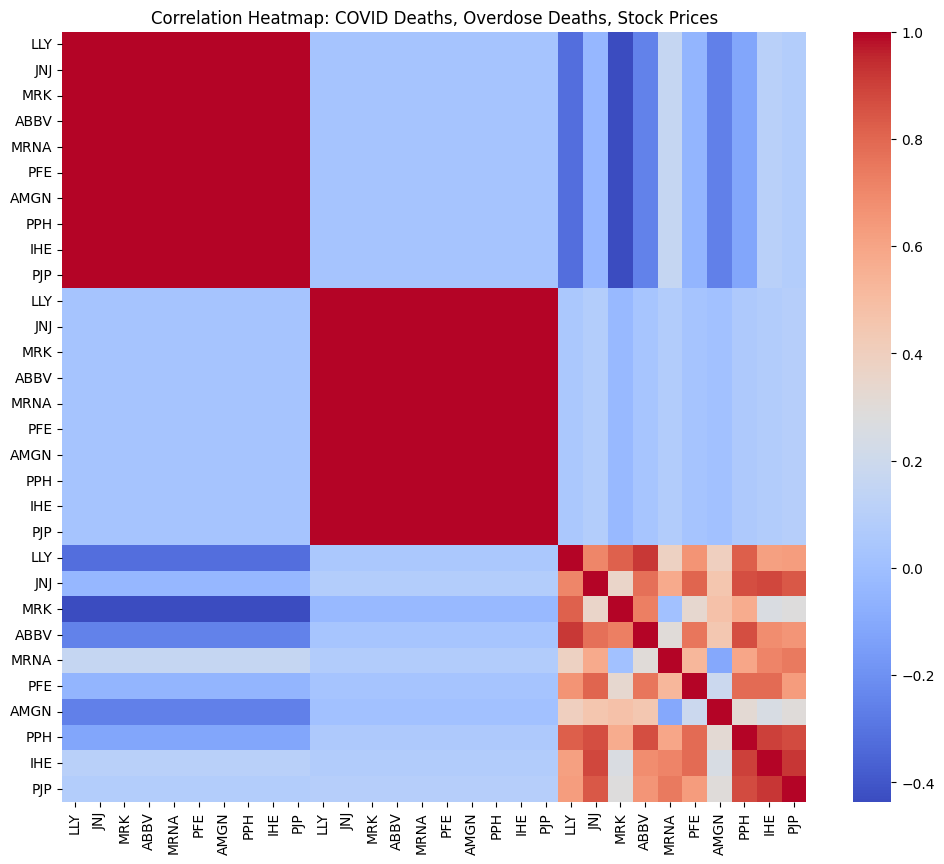

In [7]:
# Initialize empty DataFrames
combined_covid_deaths_df = pd.DataFrame()
combined_overdose_deaths_df = pd.DataFrame()
combined_stock_prices_df = pd.DataFrame()

# Combine COVID death data into one DataFrame
for symbol in tickers:
    covid_deaths_dfs = covid_dfs[f"{symbol}_df-covid"]['US covid deaths']              
    combined_covid_deaths_df = pd.concat([combined_covid_deaths_df, covid_deaths_dfs], axis=1)

combined_covid_deaths_df.columns = tickers

# Combine overdose death data into one DataFrame
for symbol in tickers:
    overdose_deaths_dfs = overdose_dfs[f"{symbol}_df-overdose"]['US Overdose Deaths']
    combined_overdose_deaths_df = pd.concat([combined_overdose_deaths_df, overdose_deaths_dfs], axis=1)

combined_overdose_deaths_df.columns = tickers

# Combine stock prices data into one DataFrame
for symbol in tickers:
    stock_prices_dfs = covid_dfs[f"{symbol}_df-covid"]['Close']
    combined_stock_prices_df = pd.concat([combined_stock_prices_df, stock_prices_dfs], axis=1)

combined_stock_prices_df.columns = tickers

# Combine all data into one DataFrame
combined_df = pd.concat([combined_covid_deaths_df, combined_overdose_deaths_df, combined_stock_prices_df], axis=1)

# Calculate correlations
correlation_matrix = combined_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap: COVID Deaths, Overdose Deaths, Stock Prices')
plt.show()

# <center style="text-align: center; color: #007bff;">Visualization 5</center>

<h3><center style="color: #DE3163;"><strong>Goal of Visual:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        To compare the trends of pharmaceutical stock prices with the trends of COVID deaths and overdose deaths over time.
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Visualization Tools:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Altair
    </li>
    <li style="font-size: 16px;">
        Matplotlib
    </li>
</ul>

<h3><center style="color: #DE3163;"><strong>Argument Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
         Companies with increasing stock prices alongside decreasing COVID/overdose deaths might suggest positive market sentiment or company performance.
    </li>
    <li style="font-size: 16px;">
        Companies with declining stock prices amidst rising COVID/overdose deaths might indicate negative market sentiment or company-specific challenges.
    </li>
    <li style="font-size: 16px;">
        Identifying divergence or convergence trends between stock prices and mortality rates can inform investment strategies or market sentiment analysis.
    </li>
    <li style="font-size: 16px;">
        Trend lines with consistent upward or downward slopes indicate strong directional trends, while erratic movements suggest volatility or external factors.
    </li>

</ul>

<h3><center style="color: #DE3163;"><strong>Visual Layout:</strong></center></h3>
<ul>
    <li style="font-size: 16px;">
        Dual y-axes for stock prices and mortality rates, allowing for direct comparison of trends.
    </li>
    <li style="font-size: 16px;">
        Line plots for each pharmaceutical company's stock prices overlaid with lines for COVID deaths and overdose deaths
    </li>
    <li style="font-size: 16px;">
        Axis labels indicating time (e.g., date) on the x-axis and appropriate units for stock prices and mortality rates on the y-axes.
    </li>
    <li style="font-size: 16px;">
        Tooltips, selection highlighting, zooming and panning
    </li>
    <li style="font-size: 16px;">
        Color-coded lines for clarity and distinction between different variables.
    </li>
</ul>

In [ ]:
# Set the maximum number of rows allowed for Altair to a higher value
alt.data_transformers.disable_max_rows()

# Melt the DataFrame to reshape it for plotting
melted_df = combined_df.melt(id_vars='index_0', var_name='Company', value_name='Stock Price')

# Create base chart for stock prices
base_chart = alt.Chart(melted_df).mark_line().encode(
    x=alt.X('index_0:O', axis=alt.Axis(title='Date')),
    y=alt.Y('Stock Price:Q', axis=alt.Axis(title='Stock Price')),
    color='Company:N'
).properties(
    width=800,
    height=400
)

# Chart for COVID deaths
covid_chart = alt.Chart(combined_df).mark_line(color='red').encode(
    x=alt.X('index_0:O', axis=alt.Axis(title='Date')),
    y=alt.Y('US covid deaths:Q', axis=alt.Axis(title='COVID Deaths'))
)

# Chart for overdose deaths
overdose_chart = alt.Chart(combined_df).mark_line(color='blue').encode(
    x=alt.X('index_0:O', axis=alt.Axis(title='Date')),
    y=alt.Y('us_overdose_deaths:Q', axis=alt.Axis(title='Overdose Deaths'))
)

# Combine all charts using layering
dual_axis_line_plot = base_chart + covid_chart + overdose_chart

# Show the plot
dual_axis_line_plot


/Users/carolynpyun/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)